# Group 10 - Project Phase 1
This notebook is the work and submission of Group 10 of CSMODEl Section S16. The group's members consist of:
* David, Peter Jan B.
* De Guzman, Evan Mari B.
* Manaois, Kyla Nicole G.
* Wangkay, Laurize Jeante G.


## Brief Description of the Dataset
The dataset being used for this study is the Spotify Top-2000s Mega Dataset. This dataset contains the Top 2000 songs in spotify, ranging from the years 1956 to 2019. This dataset has been acquired from Kaggle.com and was produced by the user Sumat Singh.

### Data Collection Process
In collecting the data, the creator of this dataset used a third party website using this link, http://sortyourmusic.playlistmachinery.com/. This third party website uses the Spotify API to extract the data of a certain song and is then collected. The third party website was created by Paul Lamere.

### Structure of the Dataset
The structure of the dataset is quite simple. There exists 1994 observations or rows and there are 15 variables or columns. Each row is an entire set of information of a song, from its title and its artist, to its popularity. Each column represents a certain variable to be discussed further after this section. The only column that has no significance in the dataset is the index column attached with the dataset as to say that the index has no real merit in ranking the song. 

## Variables in the Dataset 
- **`Title`**: Name of the track.
- **`Artist`**: Name of the artist.
- **`Top Genres`**: Genre that the track applies to.
- **`Year`**: Release year of the track.
- **`Beats per Minute (BPM)`**: Tempo of the song.
- **`Energy`**: Energy of the song. A higher value pertains to the song being more energetic.
- **`Danceability`**: Danceability of the song. A higher value pertains to how easier it is to dance to a song.
- **`Loudness`**: Loudness of the song. A higher value pertains a louder song. 
- **`Valence`**: The positivity of a song. A higher value pertains to a more positive mood for the song.
- **`Length`**: The duration of the song.
- **`Acoustic`**: The acoustic value of the song. A higher value pertains that the song was made less electronically. 
- **`Speechiness`**: The presence of spoken words in the song. A higher value pertains that the song has more spoken words.
- **`Popularity`**: The popularity of a song. A higher value pertains to a more popular song.

## Data Cleaning


### Importing Libraries
For this section of the notebook, our main focus is simply cleaning the dataset. To fufill this purpose, it is a necessity to import the numpy and the pandas library.

In [ ]:
import numpy as np
import pandas as pd

Then to load the dataset and view the first few rows with the use of `head()` function

In [ ]:
spotify_df = pd.read_csv("Spotify-2000.csv")
spotify_df.head()

Now to view the general dataset information with the use of `info()` function

In [ ]:
spotify_df.info()

Thanks to the `info()` function, we can see that there are 1994 observations and 15 columns. And within the same function, we get to see that there are exactly 1994 non-null items in every column. To double-check, this code is employed.

In [ ]:
spotify_df.isnull().any()

Now to further check the correctness of the data, the Title and Artists should have capitalized strings. To do so, the group employed the use of a function to return a boolean checking if the first character of a string is capitalized or not.

In [ ]:
def is_capitalized(s):
    return s == s.title()

is_title = spotify_df['Title'].apply(is_capitalized)
is_artist = spotify_df['Artist'].apply(is_capitalized)

capital_check = pd.DataFrame(
    {
    'Title' : is_title,
    'Artist' : is_artist
    }
)
capital_check

### Uniqueness of Values

Now, there exists another possible problem in regards to the uniqueness of certain values. For example, the title "Hallelujah" has 3 different instances. Isolated within the variable 'Title', a method of data cleaning could have been employed. However, considering other variables such as Artist or Top Genre along with BPM, Valence and the such, no method of data cleaning will be employed on such values with the same title and thus are considered unique.

In [ ]:
spotify_df.loc[(spotify_df['Title'] == 'Hallelujah')]

### The Index Column

Here is a point of contention within the group for the use of the dataset within this section. The dataset is, by all means, clean. All Titles and Artists have correct data types and are in one proper format. The only problem that is noticed within this dataset is the use of an artificial number column called 'Index'. 

Meaning to say, the elements under 'Index' are simply numbers that have no real meaning or information. So as to say, a song having the Index number 1 does not denote it to be the Top 1 song in any possible relation with a variable. Due to this, it was decided upon by the group to have the Index column removed. To justify this decision, as mentioned, it is simply an incrementing artificial number and has no real value. Furthermore, data frames have a built-in identifying index per observation and thus is also redundant. To drop the column, the `drop()` function shall be used.

In [ ]:
spotify_df = spotify_df.drop(['Index'], axis = 1)

Effectively, there are now only 14 columns or variables of interest.

### The Top Genres

The `Top Genres` column is quite a polarizing one. Consider that there are genres which are more categorically general but the dataset specifies the genre to the most possible specificity. In which case, the pre-processing of this data will require the group to bin and map nearly every possible unique entry to a general genre. 

First, the group will get the number of unique values within `Top Genres` using the `unique()` and `size` function.

In [ ]:
spotify_df['Top Genre'].unique().size

From the code above, it returns 149 unique values in the Top Genre. By all metrics, there is too much and no possible relationships or conclusions can be made with this level of specificity. Thus, the group will create a function that checks the string within `Top Genre` and if falls under a specific condition. This condition generalizes all specific genres. 

In [ ]:
def generalized_genre(genre):
    if 'metal' in genre:
        return 'metal'
    elif 'pop' in genre:
        return 'pop'
    elif 'rock' in genre:
        return 'rock'
    elif 'hip hop' in genre:
        return 'hip hop'
    elif 'adult' in genre:
        return 'adult'
    elif 'indie' in genre:
        return  'indie'
    elif any(sub_genre in genre for sub_genre in ['soul' or 'blues' or 'funk' or 'disco' or 'reggae']):
        return 'R&B'
    elif 'folk' in genre:
        return 'folk'
    elif 'british invasion' in genre:
        return 'rock'
    elif 'country' in genre:
        return 'country'
    else:
        return 'other'
    
spotify_df['General Genre'] = spotify_df['Top Genre'].apply(generalized_genre)
spotify_df.loc[36]


In this example, The song "Iris" by The Goo Goo Dolls is listed as "alternate rock". With the function that the group has applied, there now is a related `General Genre` with the generalized value "rock".

### Feature Engineering

The nature of this dataset is practically clean, besides the redundant `Index` column. In this case, to make up for the lack of need of data cleaning, the group will instead do feature engineering. In essence, the group will try to create new variables that can be of value for further analysis and study.

Firstly, we can make a categorized mood category that uses the Valence and Energy variables, called the `Affective Mood`. There would be three moods, those being Happy, Calm or Sad. 

In [ ]:
def mood_category(row):
    if row['Valence'] > 50 and row['Energy'] > 50:
        return 'Happy'
    elif row['Valence'] > 50 and row['Energy'] <= 50:
        return 'Calm'
    else:
        return 'Sad'

spotify_df['Affective Mood'] = spotify_df.apply(mood_category, axis = 1)
spotify_df

Another feature that we can add is the decade of the release of the song. For this, our primary focus is the `Year` variable and making a `Decade` variable.

In [ ]:
spotify_df['Decade'] = (spotify_df['Year'] // 10) * 10
spotify_df

Now there exists in our dataframe observations showing what decade a song has released. 

## Exploratory Data Analysis

In this portion, we perform an explanatory data analysis to have a comprehensive understanding of the Spotify dataset. This is to help in the formulation of the research question of the project.



## Importing more libraries

Considering the nature of exploratory data analysis, there is aneed for more python libraries. The said libraries would be `matplotlib` and `scipy`.   

In [ ]:
import matplotlib.pyplot as plt

[will be deleted]
CLT
1 What are the mean, median, and mode for each numeric attribute (BPM, Energy, Danceability, Loudness, Valence, Length, Acoustic, Speechiness, Popularity)?
   sub question: What is the standard deviation and variance for these numeric attributes?

Trends and Genre //from previous thingy
5 How do the average values of numeric features change over the years (Year-wise trends)?
  sub question: Are there any noticeable trends in the popularity of songs over the years?
6 What are the average values of numeric features for each genre (Top Genres)?
  sub question: How does the popularity vary across different genres?



#code here

### Question 1 : What are the mean, median, mode, standard deviation, and variance for each numeric attribute (BPM, Energy, Danceability, Loudness, Valence, Length, Acousticness, Speechiness, Popularity)? 

To answer this question, we simultaneously obtain the mean, median, mode, standard deviation, and variance. Next, we divide them into attributes. Then, we use the extra step of converting string values to numeric and drop them as the code also reads the title of each column (eg. Energy: [values], the Energy title gets read). We read each column and calculate the mean, median, and mode. Finally, we format them to display in only 2 decimal places.

In [ ]:
numeric_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']

summary_stats = {'Attribute': [], 'Mean': [], 'Median': [], 'Mode': [], 'Standard Deviation': [], 'Variance': []}

for column in numeric_columns:
    if column in spotify_df.columns:
        spotify_df[column] = pd.to_numeric(spotify_df[column], errors='coerce')

        summary_stats['Attribute'].append(column)
        summary_stats['Mean'].append(spotify_df[column].mean())
        summary_stats['Median'].append(spotify_df[column].median())
        summary_stats['Mode'].append(spotify_df[column].mode().dropna().values[0] if not spotify_df[column].mode().dropna().empty else None)
        summary_stats['Standard Deviation'].append(spotify_df[column].std())
        summary_stats['Variance'].append(spotify_df[column].var())
    else:
        print(f"Column {column} not found in the DataFrame")

summary_df = pd.DataFrame(summary_stats)

summary_df['Mean'] = summary_df['Mean'].map("{:.2f}".format)
summary_df['Median'] = summary_df['Median'].map("{:.2f}".format)
summary_df['Mode'] = summary_df['Mode'].map("{:.2f}".format)
summary_df['Standard Deviation'] = summary_df['Standard Deviation'].map("{:.2f}".format)
summary_df['Variance'] = summary_df['Variance'].map("{:.2f}".format)

print(summary_df)

We can also check the distribution by using histograms and boxplots to display the data. The histogram is used for visualizing the the distribution of a single variable and can be applied to provide insight about the shape of the distribution (skewness). The boxplot is to summarize the distribution of a variable and serve as a way to compare multiple distributions. This is more technical and provides us a better visual summary of the median, quartiles, and potential outliers. Utilizing them both will give us a detailed view of the data distribution while offering a concise summary of key statistics and comparison of central tendency. 

The code provided displays the histograms and boxplots of each attributes.

In [ ]:
fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(14, 2 * len(numeric_columns)))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    if column in spotify_df.columns:
        spotify_df[column] = pd.to_numeric(spotify_df[column], errors='coerce')
      
        axs[i, 0].hist(spotify_df[column], bins=10, edgecolor='black', alpha=0.7)
        axs[i, 0].set_title(f'Histogram of {column}')
        axs[i, 0].set_xlabel(column)
        axs[i, 0].set_ylabel('Frequency')

        axs[i, 1].boxplot(spotify_df[column], vert=False)
        axs[i, 1].set_title(f'Boxplot of {column}')
        axs[i, 1].set_xlabel(column)

    else:
        print(f"Column {column} not found in the DataFrame")

plt.show()

### Question 2: Which genres are most prevalent in this dataset?

For the Numerical Summary, we will calculate the frequency of each genre. While for the Visualization, bar chart will be used to display the most prevalent genres.

In [ ]:
genre_counts = spotify_df['Top Genre'].value_counts()

top_genres = genre_counts.head(10)
print(top_genres)

plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Most Prevalent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The frequency count shows which genres are most common in the dataset. The bar chart provides a visual representation, making it easier to compare the prevalence of different genres at a glance.

Considering the specificity of the `Top Genre` column, the same analysis can be done on the `General Genre` column so as to see for any future possibilities. 

General Genre
rock       883
pop        398
other      313
adult      123
metal       93
indie       79
R&B         45
hip hop     29
folk        19
country     12
Name: count, dtype: int64


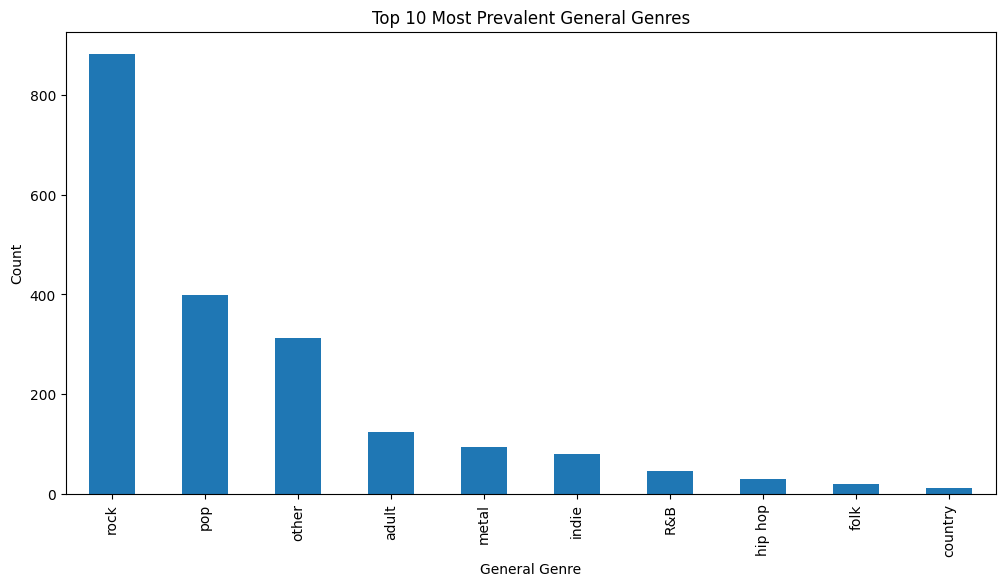

In [24]:
gen_genre_counts = spotify_df['General Genre'].value_counts()

gen_genres = gen_genre_counts.head(10)
print(gen_genres)

plt.figure(figsize=(12, 6))
gen_genres.plot(kind='bar')
plt.title('Top 10 Most Prevalent General Genres')
plt.xlabel('General Genre')
plt.ylabel('Count')
plt.show()

### Question 3: What genres tend to have longer song durations?

### Question 4: What is the average song length `Length (Duration)` by genre?

For the Numerical Summary, we will compute the average song length for each genre. While for the Visualization, a bar chart will display the average song length for the top genres.

### Question 5: Which `Top Genre` has the highest average `Popularity`? 

### Question 6: How do the average values of numeric features change over the years (Year-wise trends)?

### Question 7: What are the average values of numeric features for each genre (Top Genres)?

## Research Question

## Research Question